1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

(a) A Classification Decision Tree is a supervised learning method used to categorize data into discrete classes based on input features. It works by splitting data into subsets using decision rules that aim to maximize class purity, resulting in an interpretable and intuitive model.

(b)Decision trees classify into categories, while linear regression predicts numeric values using linear relationships.

2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

2.1 In a financial system predicting whether a loan application will be approved or denied, assuming there is a roughly equal number of approved and denied loans. Accuracy works well in scenarios where the dataset is balanced and both types of errors (false positives and false negatives) carry similar consequences. It provides a straightforward measure of overall correctness.

2.2  In a healthcare system, identifying patients with cancer based on diagnostic tests. Sensitivity is critical in situations where failing to identify a positive case (false negative) has severe consequences, such as missing a cancer diagnosis. High sensitivity ensures most actual positive cases are detected, even if some false positives occur.

2.3 In large-scale medical screenings for rare diseases (e.g., HIV testing), confirming individuals who do not have the disease. Specificity is crucial in scenarios where false positives (incorrectly identifying healthy individuals as diseased) need to be minimized, as these can lead to unnecessary stress, further testing, and increased costs. High specificity ensures most actual negative cases are correctly identified.

2.4 Identifying fraudulent transactions in a credit card system. Precision is vital in situations where false positives (flagging legitimate transactions as fraudulent) are costly or disruptive. High precision ensures that when the system flags a transaction as fraud, it is very likely to be correct, reducing the burden of investigating false alarms.

In [7]:
# Display the processed dataset
print("Processed Amazon Books Dataset:")
print(ab_reduced_noNaN)

# Display initial exploratory data analysis (EDA)
print("\nShape of the Dataset:")
print(ab_reduced_noNaN.shape)

print("\nData Types:")
print(ab_reduced_noNaN.dtypes)

print("\nMissing Values:")
print(ab_reduced_noNaN.isnull().sum())

print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe(include='all'))

Processed Amazon Books Dataset:
                                                 Title               Author  \
0    1,001 Facts that Will Scare the S#*t Out of Yo...          Cary McNeal   
1    21: Bringing Down the House - Movie Tie-In: Th...          Ben Mezrich   
2         100 Best-Loved Poems (Dover Thrift Editions)                Smith   
3              1421: The Year China Discovered America        Gavin Menzies   
4      1493: Uncovering the New World Columbus Created      Charles C. Mann   
..                                                 ...                  ...   
320                            Where the Sidewalk Ends     Shel Silverstein   
321                                    White Privilege  Paula S. Rothenberg   
322                                Why I wore lipstick        Geralyn Lucas   
323  Worlds Together, Worlds Apart: A History of th...        Robert Tignor   
324                                  Wuthering Heights         Emily Bronte   

     List Price  Am

In [13]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Create `ab_reduced_noNaN` based on the requirements
# Step 1: Remove columns `Weight_oz`, `Width`, and `Height`
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

# Step 2: Drop rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Set data types using `.loc` to avoid warnings
ab_reduced_noNaN = ab_reduced_noNaN.copy()  # Ensure we are working on a new DataFrame
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')


# Display initial exploratory data analysis (EDA)
eda_summary = {
    "Shape": ab_reduced_noNaN.shape,
    "Data Types": ab_reduced_noNaN.dtypes,
    "Missing Values": ab_reduced_noNaN.isnull().sum(),
    "Summary Statistics": ab_reduced_noNaN.describe(include='all')
}

4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Prepare the data
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable: Hardcover (1) or not (0)
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Step 2: Create the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 3: Train the classifier
clf.fit(X, y)

# Output the trained model
print("Classification tree trained successfully!")


Classification tree trained successfully!


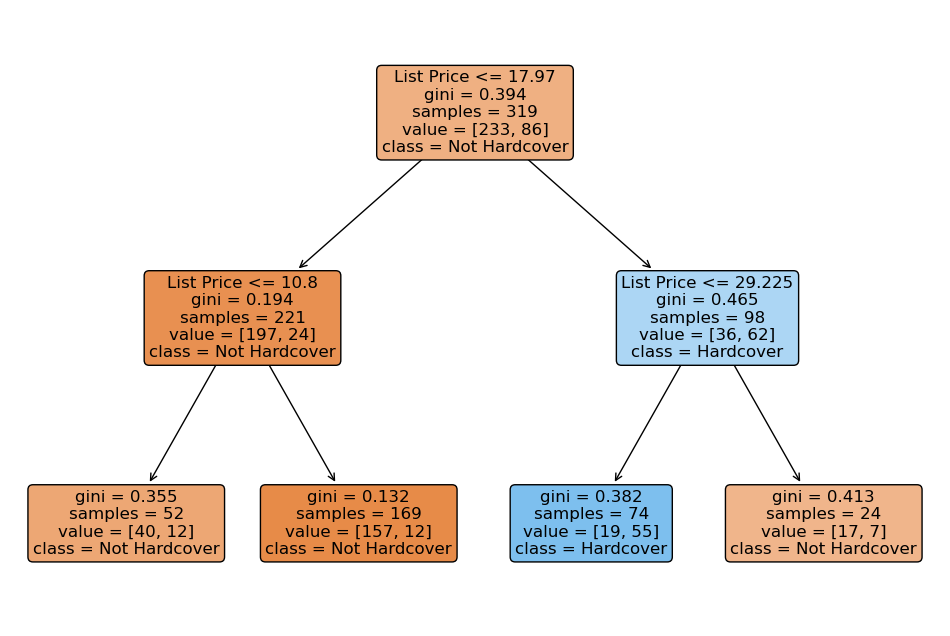

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=['Not Hardcover', 'Hardcover'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()


5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

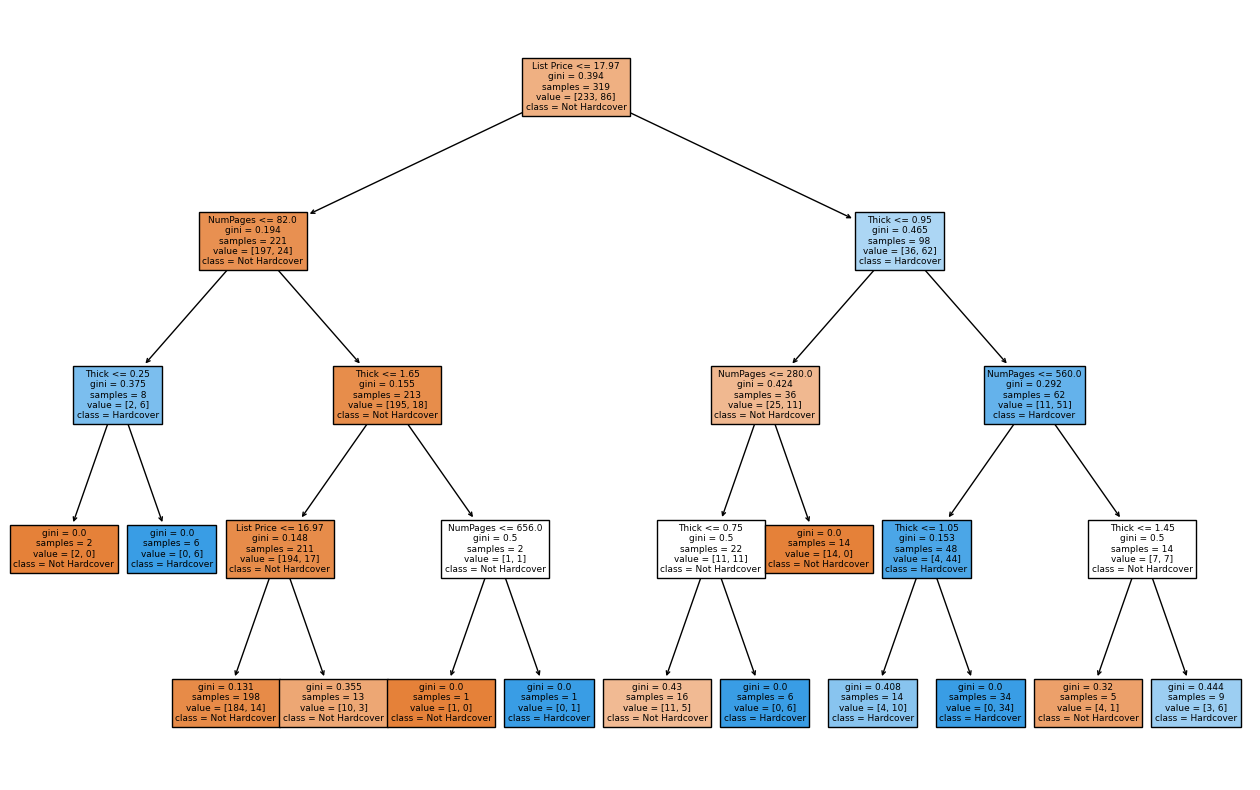

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features
y2 = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable: Hardcover (1) or not (0)

# Step 2: Train the classifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X2, y2)

# Step 3: Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    clf2, 
    feature_names=['NumPages', 'Thick', 'List Price'], 
    class_names=['Not Hardcover', 'Hardcover'], 
    filled=True
)
plt.show()


6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Reload the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Preprocessing the dataset
# Remove unwanted columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

# Drop rows with missing values
ab_reduced_noNaN = ab_reduced.dropna()

# Fixing the SettingWithCopyWarning by ensuring changes are applied explicitly
ab_reduced_noNaN = ab_reduced_noNaN.copy()
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 2: Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    ab_reduced_noNaN[['List Price', 'NumPages', 'Thick']],  # Features for clf2
    pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'],  # Target variable
    test_size=0.3,
    random_state=42
)

# Step 3: Training the models
# clf: Using only "List Price"
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train[['List Price']], y_train)

# clf2: Using "List Price", "NumPages", and "Thick"
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Step 4: Predictions
y_pred_clf = clf.predict(X_test[['List Price']])
y_pred_clf2 = clf2.predict(X_test)

# Step 5: Evaluation
# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Extract metrics for clf
tn_clf, fp_clf, fn_clf, tp_clf = cm_clf.ravel()
sensitivity_clf = tp_clf / (tp_clf + fn_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Extract metrics for clf2
tn_clf2, fp_clf2, fn_clf2, tp_clf2 = cm_clf2.ravel()
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Step 6: Present results
results = {
    "Model": ["clf (List Price only)", "clf2 (List Price, NumPages, Thick)"],
    "Sensitivity": [sensitivity_clf, sensitivity_clf2],
    "Specificity": [specificity_clf, specificity_clf2],
    "Accuracy": [accuracy_clf, accuracy_clf2]
}

results_df = pd.DataFrame(results)

# Display the results
print("Model Performance Comparison:")
print(results_df)

# Optionally save results to a CSV file
results_df.to_csv("model_performance_comparison.csv", index=False)


Model Performance Comparison:
                                Model  Sensitivity  Specificity  Accuracy
0               clf (List Price only)     0.551724     0.880597  0.781250
1  clf2 (List Price, NumPages, Thick)     0.689655     0.895522  0.833333


7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

The confusion matrices differ because clf was trained only on List Price, but the second confusion matrix includes extra features (NumPages and Thick) that clf wasn’t trained to use. This causes clf to perform poorly since it doesn’t know how to handle those features. In contrast, clf2 was trained and tested using the same features (List Price, NumPages, and Thick), so its results are consistent and accurate. Models work best when they are evaluated using the same features they were trained on.

8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

In [27]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Ensure the dataset is loaded and preprocessed
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocess data
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore').dropna()
ab_reduced = ab_reduced.copy()
ab_reduced['Pub year'] = ab_reduced['Pub year'].astype(int)
ab_reduced['NumPages'] = ab_reduced['NumPages'].astype(int)
ab_reduced['Hard_or_Paper'] = ab_reduced['Hard_or_Paper'].astype('category')

# Split data
from sklearn.model_selection import train_test_split
X = ab_reduced[['List Price', 'NumPages', 'Thick']]
y = pd.get_dummies(ab_reduced["Hard_or_Paper"])['H']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Get feature importances and feature names
feature_names = clf2.feature_names_in_
feature_importances = clf2.feature_importances_

# Create a report
importance_report = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the most important feature
most_important_feature = importance_report.iloc[0]

# Display the full report for user
print("Feature Importance Report:")
print(importance_report)
print("\nMost Important Feature:")
print(most_important_feature)


Feature Importance Report:
      Feature  Importance
0  List Price    0.509221
2       Thick    0.288859
1    NumPages    0.201920

Most Important Feature:
Feature       List Price
Importance      0.509221
Name: 0, dtype: object


9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, coefficients show how much the target changes for a one-unit change in a feature, assuming other features stay constant. This makes linear models easy to interpret but only suitable for linear relationships. In decision trees, feature importance measures how much each feature helps reduce prediction error or impurity across all splits. It doesn’t assume linearity but isn’t as directly interpretable as specific numerical effects.

10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes

Summary:
Exploratory Data Analysis (EDA) and Preprocessing:

Removed columns Weight_oz, Width, and Height.
Dropped rows with missing values (NaN).
Converted Pub year and NumPages to integers and Hard_or_Paper to a categorical type.
Addressed SettingWithCopyWarning by using .loc[] and creating a copy of the DataFrame to ensure proper modifications.
Training and Evaluating Decision Tree Models:

Trained clf using only the List Price variable with max_depth=2.
Trained clf2 using List Price, NumPages, and Thick as features with max_depth=4.
Compared performance using confusion matrices and calculated sensitivity, specificity, and accuracy:
clf: Sensitivity = 0.55, Specificity = 0.88, Accuracy = 0.78.
clf2: Sensitivity = 0.69, Specificity = 0.90, Accuracy = 0.83.
Highlighted that clf2 performed better due to incorporating more features and deeper splits.
Feature Importance Analysis:

Visualized feature importances for clf2 using a bar chart, showing which predictors contributed most to the model.
Determined the most important predictor variable using .feature_names_in_ and .feature_importances_.
Model Interpretation Differences:

Explained that linear regression coefficients indicate the direct, constant effect of features, making them interpretable but limited to linear relationships.
Highlighted that decision tree feature importances measure relative contributions without assuming linearity but lack the specific numerical interpretation of linear regression coefficients.
Practical Challenges:

Resolved issues like dataset accessibility and ModuleNotFoundError for unavailable tools like ace_tools.
Provided alternative methods for displaying results and fixed common warnings to ensure reproducibility.
Final Deliverables:

A complete set of corrected and functional code for preprocessing, training, evaluation, and feature importance analysis.
Key insights on model comparisons and interpretation differences between linear regression and decision trees.
Link:https://chatgpt.com/share/67400634-49bc-8000-a436-777a7d223405